In [1]:
target_rd = 3000

import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
print(df_cd8.shape)
print(df_cd4.shape)
df_cd8

(59599, 7)
(58584, 6)


,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
P1.tr.1.AAACCTGGTGATGCCC-1,0.229220,0.070671,-0.088936,0.045396,0.265197,1.578323,0.088151
P1.tr.1.AAACGGGTCATACGGT-1,0.328672,0.204518,0.088267,0.261208,0.746716,1.563012,0.047467
P1.tr.1.AAAGATGGTCGGCACT-1,0.424730,0.246822,0.075818,0.364435,0.514320,2.627107,0.327220
P1.tr.1.AAAGCAACAACGCACC-1,0.272637,0.141539,-0.094156,0.222710,0.406241,2.086244,0.136833
P1.tr.1.AAATGCCTCCGCAAGC-1,0.262455,0.076544,0.048752,0.082026,0.458444,1.698286,0.277308
...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,0.403082,0.182099,-0.001340,0.347046,0.600238,1.523950,0.133284
P9.ut.TTGGCAATCAGCTTAG-1,0.292876,0.079683,-0.009155,0.182049,0.618722,1.322553,0.254789
P9.ut.TTTATGCGTGGCAAAC-1,0.366441,0.207521,0.036062,0.409483,0.627031,1.589833,0.056607
P9.ut.TTTGGTTTCCTCAACC-1,0.341509,0.201506,0.087572,0.365407,0.709190,1.816634,0.259639


In [2]:
metadata = pd.read_csv("GSE179994_Tcell.metadata.tsv.gz", sep="\t", compression="gzip")
t_cell_types = ['CD4','CD8']
metadata = metadata[metadata["celltype"].isin(t_cell_types)]
metadata = metadata.set_index('cellid')
df_cd8 = df_cd8.join(metadata)
df_cd4 = df_cd4.join(metadata)

print(df_cd8.shape)
print(df_cd4.shape)

(59599, 11)
(58584, 10)


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8_Lowery_pos_243g", 
    "CD8_Oliveira_TTE_100g", 
    "CD8_Oliveira_pos_74g", 
    "CD8_Yost_CD8_Exh_100g", 
    "CD8_ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    "CD8_ave_Hanada_neg_5g", 
    "CD8_ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "CD4_ave_Hanada_pos_9g", 
    "CD4_Caushi_Tfh2_66g", 
    "CD4_Lowery_pos_40g", 
    "CD4_Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4_Lowery_neg_37g", 
    "CD4_ave_Hanada_neg_4g"
]


def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df[df["celltype"] == cell_type].copy()

    # z‐score the signatures _within_ this subset
    z_pos = sub[pos_sigs].apply(zscore)
    z_neg = sub[neg_sigs].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = z_pos.mean(axis=1)
    sub[f"neg_score_{cell_type}"] = z_neg.mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8 = classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)

print(cd8_called.shape)
print(cd4_called.shape)
cd8_called

(59599, 14)
(58584, 13)


,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,patient,sample,celltype,cluster,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
P1.tr.1.AAACCTGGTGATGCCC-1,0.229220,0.070671,-0.088936,0.045396,0.265197,1.578323,0.088151,P1,P1.post.1,CD8,Non-exhausted,-1.086949,-0.566859,False
P1.tr.1.AAACGGGTCATACGGT-1,0.328672,0.204518,0.088267,0.261208,0.746716,1.563012,0.047467,P1,P1.post.1,CD8,Non-exhausted,0.430789,-0.791230,True
P1.tr.1.AAAGATGGTCGGCACT-1,0.424730,0.246822,0.075818,0.364435,0.514320,2.627107,0.327220,P1,P1.post.1,CD8,Non-exhausted,0.608493,2.160565,False
P1.tr.1.AAAGCAACAACGCACC-1,0.272637,0.141539,-0.094156,0.222710,0.406241,2.086244,0.136833,P1,P1.post.1,CD8,Non-exhausted,-0.480273,0.421080,False
P1.tr.1.AAATGCCTCCGCAAGC-1,0.262455,0.076544,0.048752,0.082026,0.458444,1.698286,0.277308,P1,P1.post.1,CD8,Non-exhausted,-0.548110,0.548020,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,0.403082,0.182099,-0.001340,0.347046,0.600238,1.523950,0.133284,P9,P9.pre,CD8,Tex,0.385091,-0.422807,True
P9.ut.TTGGCAATCAGCTTAG-1,0.292876,0.079683,-0.009155,0.182049,0.618722,1.322553,0.254789,P9,P9.pre,CD8,Non-exhausted,-0.265499,-0.115852,False
P9.ut.TTTATGCGTGGCAAAC-1,0.366441,0.207521,0.036062,0.409483,0.627031,1.589833,0.056607,P9,P9.pre,CD8,Tex,0.526818,-0.706462,True
P9.ut.TTTGGTTTCCTCAACC-1,0.341509,0.201506,0.087572,0.365407,0.709190,1.816634,0.259639,P9,P9.pre,CD8,Tex,0.561703,0.634259,False


In [4]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)
df_combined

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,patient,sample,celltype,cluster,...,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
P1.tr.1.AAACCTGCACATGACT-1,0.216882,0.398687,0.203925,-0.014833,0.713283,1.534146,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACCTGCAGATCGGA-1,0.240405,0.230371,0.372116,-0.012584,0.968033,0.485711,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACCTGCAGATGGGT-1,0.213243,0.438193,0.339996,0.066803,0.790234,1.104862,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACCTGGTCGGATCC-1,0.131645,0.369314,0.110850,-0.119481,1.036427,0.609522,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACCTGGTTAAGATG-1,0.006114,0.455229,0.101175,-0.119300,0.578606,0.491744,P1,P1.post.1,CD4,CD4_C4-CD69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,0.403082,0.182099,-0.001340,0.347046,0.600238,1.523950,0.133284,0.385091,-0.422807,True
P9.ut.TTGGCAATCAGCTTAG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Non-exhausted,...,0.292876,0.079683,-0.009155,0.182049,0.618722,1.322553,0.254789,-0.265499,-0.115852,False
P9.ut.TTTATGCGTGGCAAAC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,0.366441,0.207521,0.036062,0.409483,0.627031,1.589833,0.056607,0.526818,-0.706462,True
P9.ut.TTTGGTTTCCTCAACC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,0.341509,0.201506,0.087572,0.365407,0.709190,1.816634,0.259639,0.561703,0.634259,False


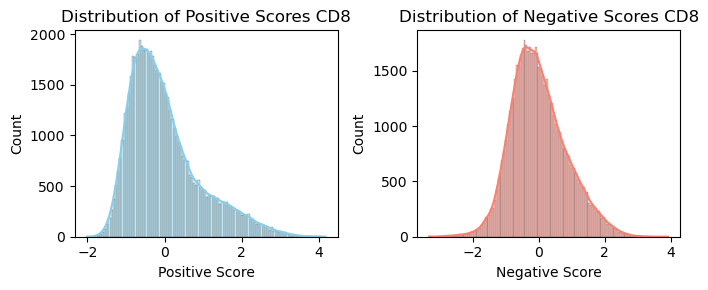

In [5]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

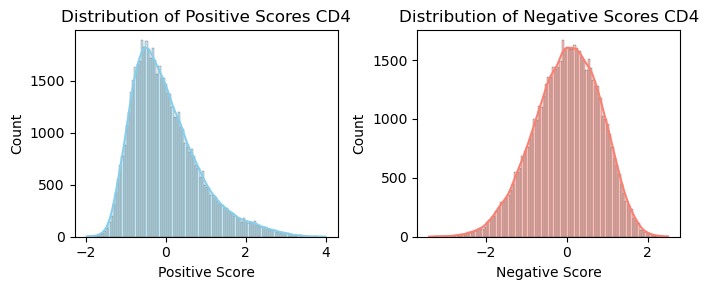

In [6]:
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

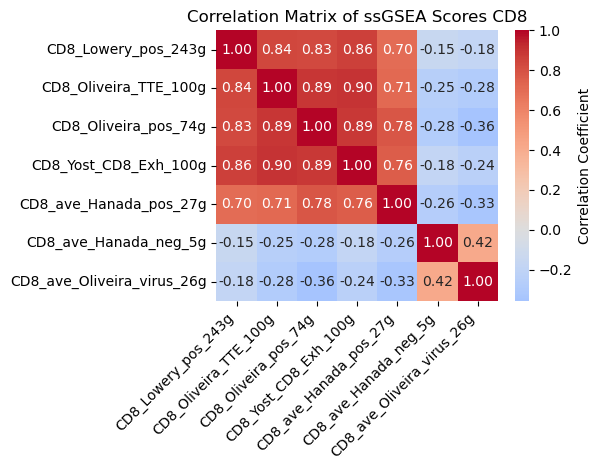

In [7]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

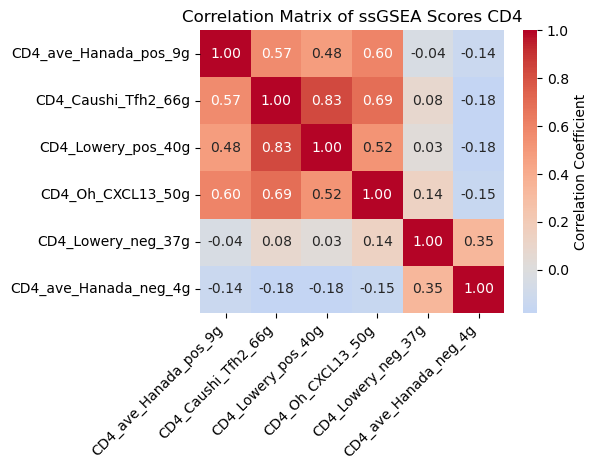

In [8]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [9]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [10]:
import scanpy as sc
import numpy as np

# Load the sparse matrix
adata = sc.read_mtx("GSE179994_all.Tcell.rawCounts.mtx")

adata.obs_names = [line.strip() for line in open("barcodes.txt")]
adata.var_names = [line.strip() for line in open("features.txt")]   
metadata_df = pd.read_csv("GSE179994_Tcell.metadata.tsv.gz", sep="\t", compression="gzip")

metadata_df = metadata_df.set_index('cellid')

adata.obs.index.name = 'cellid'

adata.obs = adata.obs.join(metadata_df, how='left')

t_cell_types = [
'CD4',
'CD8'
]
adata = adata[adata.obs["celltype"].isin(t_cell_types)]


In [11]:
adata.obs


,patient,sample,celltype,cluster
cellid,,,,
P1.ut.AAACCTGGTGGTACAG-1,P1,P1.pre,CD4,CD4_C8-Treg
P1.ut.AAACCTGTCACGGTTA-1,P1,P1.pre,CD4,CD4_C8-Treg
P1.ut.AAACCTGTCCGCTGTT-1,P1,P1.pre,CD4,CD4_C9-Prolif.
P1.ut.AAACCTGTCTTGAGAC-1,P1,P1.pre,CD4,CD4_C8-Treg
P1.ut.AAACGGGAGTCCCACG-1,P1,P1.pre,CD4,CD4_C9-Prolif.
...,...,...,...,...
P38.tr.1.TTTGGTTGTTGTTTGG-1,P38,P38.post.1,CD4,CD4_C2-Tcm
P38.tr.1.TTTGGTTTCGTAGATC-1,P38,P38.post.1,CD8,Non-exhausted
P38.tr.1.TTTGTCAAGCGATCCC-1,P38,P38.post.1,CD8,Non-exhausted


In [12]:
sc.pp.normalize_total(adata, target_sum=target_rd)
sc.pp.log1p(adata)  # log transform


/Users/wsun/anaconda3/envs/CAT/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [14]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 156/164 CD4 genes are found.
 386/396 CD8 genes are found.


/Users/wsun/anaconda3/envs/CAT/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_97318/3048082885.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(sub_adata, resolution=0.5)


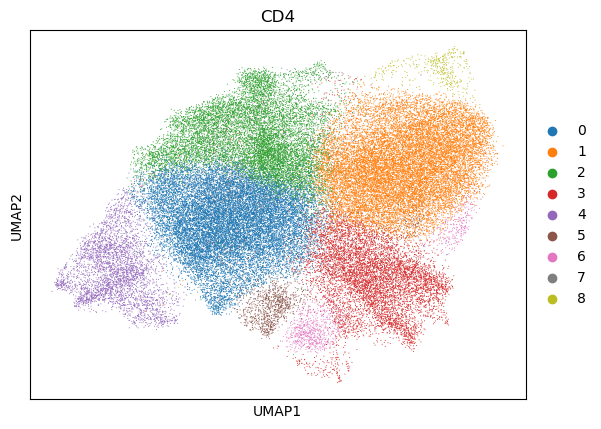

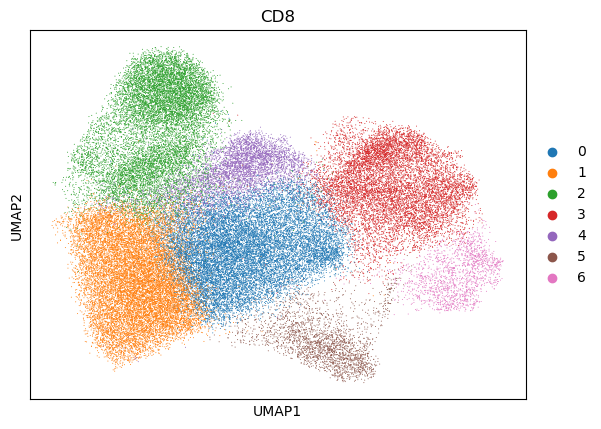

In [15]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

cd4_mask = adata.obs["celltype"]=='CD4'
cd8_mask = adata.obs["celltype"]=='CD8'

leiden_cd4 = run_cluster(adata[cd4_mask, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata[cd8_mask, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


In [16]:
merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])
print(df_combined.shape)
print(merged_df.shape)
merged_df

(118183, 23)
(118183, 25)


,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,patient,sample,celltype,cluster,...,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8
P1.tr.1.AAACCTGCACATGACT-1,0.216882,0.398687,0.203925,-0.014833,0.713283,1.534146,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
P1.tr.1.AAACCTGCAGATCGGA-1,0.240405,0.230371,0.372116,-0.012584,0.968033,0.485711,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
P1.tr.1.AAACCTGCAGATGGGT-1,0.213243,0.438193,0.339996,0.066803,0.790234,1.104862,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
P1.tr.1.AAACCTGGTCGGATCC-1,0.131645,0.369314,0.110850,-0.119481,1.036427,0.609522,P1,P1.post.1,CD4,CD4_C8-Treg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
P1.tr.1.AAACCTGGTTAAGATG-1,0.006114,0.455229,0.101175,-0.119300,0.578606,0.491744,P1,P1.post.1,CD4,CD4_C4-CD69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,-0.001340,0.347046,0.600238,1.523950,0.133284,0.385091,-0.422807,True,NaN,3
P9.ut.TTGGCAATCAGCTTAG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Non-exhausted,...,-0.009155,0.182049,0.618722,1.322553,0.254789,-0.265499,-0.115852,False,NaN,0
P9.ut.TTTATGCGTGGCAAAC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,0.036062,0.409483,0.627031,1.589833,0.056607,0.526818,-0.706462,True,NaN,3
P9.ut.TTTGGTTTCCTCAACC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,Tex,...,0.087572,0.365407,0.709190,1.816634,0.259639,0.561703,0.634259,False,NaN,3


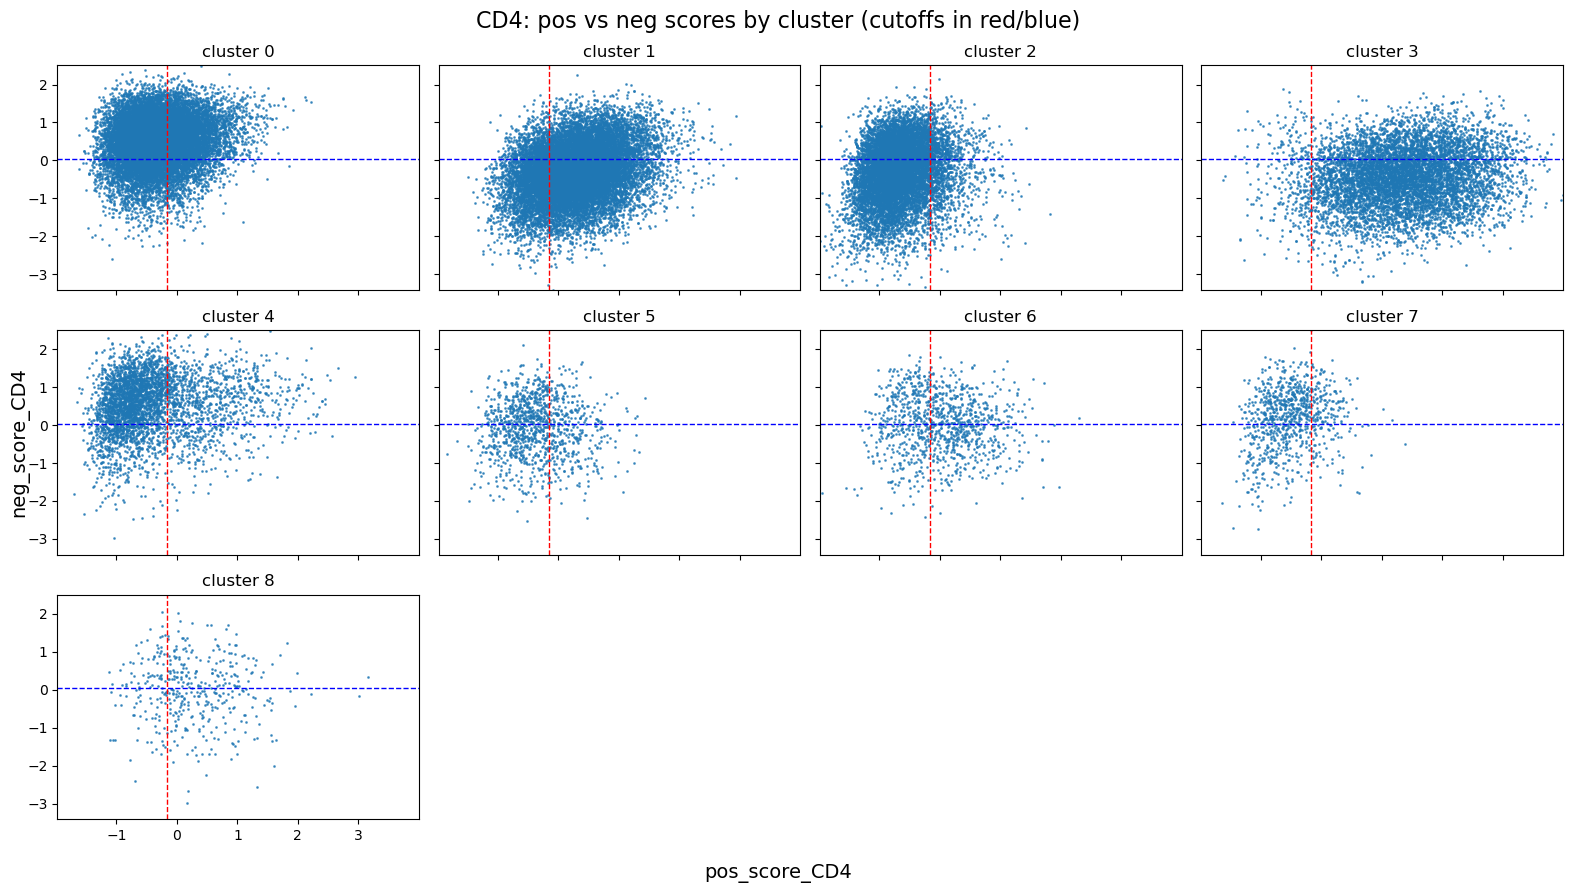

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

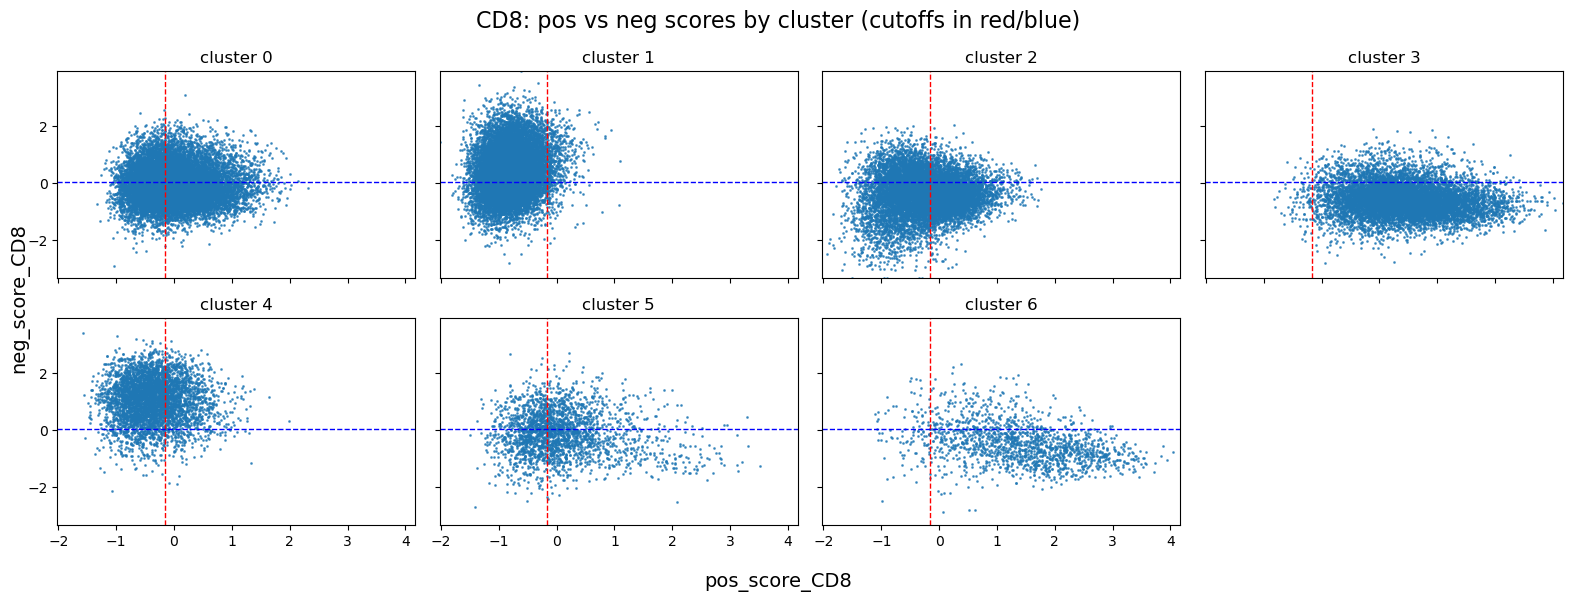

In [18]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
        
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [19]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["celltype"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["celltype"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["celltype", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,celltype,cluster,reactive_fraction
0,CD4,0,0.061434
1,CD4,1,0.496760
2,CD4,2,0.066285
3,CD4,3,0.695462
4,CD4,4,0.063501
5,CD4,5,0.175618
6,CD4,6,0.307331
7,CD4,7,0.068694
8,CD4,8,0.391509
9,CD8,0,0.304482


In [20]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD4', '1'), ('CD4', '3'), ('CD8', '3'), ('CD8', '6')}

In [21]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["celltype"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,patient,sample,celltype,cluster,...,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster
P1.tr.1.AAACCTGCACATGACT-1,0.216882,0.398687,0.203925,-0.014833,0.713283,1.534146,P1,P1.post.1,CD4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,False,True
P1.tr.1.AAACCTGCAGATCGGA-1,0.240405,0.230371,0.372116,-0.012584,0.968033,0.485711,P1,P1.post.1,CD4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True
P1.tr.1.AAACCTGCAGATGGGT-1,0.213243,0.438193,0.339996,0.066803,0.790234,1.104862,P1,P1.post.1,CD4,6,...,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,True,False
P1.tr.1.AAACCTGGTCGGATCC-1,0.131645,0.369314,0.110850,-0.119481,1.036427,0.609522,P1,P1.post.1,CD4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True
P1.tr.1.AAACCTGGTTAAGATG-1,0.006114,0.455229,0.101175,-0.119300,0.578606,0.491744,P1,P1.post.1,CD4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,3,...,0.600238,1.523950,0.133284,0.385091,-0.422807,True,NaN,3,True,True
P9.ut.TTGGCAATCAGCTTAG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,0,...,0.618722,1.322553,0.254789,-0.265499,-0.115852,False,NaN,0,False,False
P9.ut.TTTATGCGTGGCAAAC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,3,...,0.627031,1.589833,0.056607,0.526818,-0.706462,True,NaN,3,True,True
P9.ut.TTTGGTTTCCTCAACC-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,3,...,0.709190,1.816634,0.259639,0.561703,0.634259,False,NaN,3,False,True


# Join with TCR data

In [22]:
import pandas as pd
vdj = pd.read_csv("GSE179994_all.scTCR.tsv.gz", sep="\t", compression="gzip")
vdj

,CellName,Identifier(Alpha1),CDR3(Alpha1),CDR3_nt(Alpha1),V_gene(Alpha1),J_gene(Alpha1),nRead(Alpha1),nUMI(Alpha1),Length(Alpha1),Full_length(Alpha1),...,CDR3(Beta2),CDR3_nt(Beta2),V_gene(Beta2),J_gene(Beta2),nRead(Beta2),nUMI(Beta2),Length(Beta2),Full_length(Beta2),sample,clone.id
0,P1.tr.1.AAACCTGCACATGACT-1,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...,CALSDRVGGTSYGKLTF,TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGGAAAGCTGA...,TRAV9-2,TRAJ52,13482,13,504,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...
1,P1.tr.1.AAACCTGCAGATCGGA-1,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...,CAVLNQAGTALIF,TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTTT,TRAV8-4,TRAJ15,39362,37,567,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...
2,P1.tr.1.AAACCTGCAGATGGGT-1,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...,CAASIGETSGSRLTF,TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAGGTTGACCTTT,TRAV23/DV6,TRAJ58,6194,4,514,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...
3,P1.tr.1.AAACCTGGTCGGATCC-1,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ34,CAAYNTDKLIF,TGTGCTGCCTATAACACCGACAAGCTCATCTTT,TRAV41,TRAJ34,3338,3,619,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ3...
4,P1.tr.1.AAACCTGGTTAAGATG-1,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...,CAMRGMYSSASKIIF,TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAAGATAATCTTT,TRAV14/DV4,TRAJ3,3648,5,526,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P1.post.1,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86397,P11.ut.TTTGGTTCACGGTTTA-1,TRAV29/DV5_TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACT...,CAASGTSNTGKLIF,TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACTAATCTTT,TRAV29/DV5,TRAJ37,6069,4,521,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P11.pre,TRAV29/DV5_TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACT...
86398,P11.ut.TTTGGTTGTACATGTC-1,TRAV38-2/DV8_TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTT...,CAPCHNQGGKLIF,TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTTATCTTC,TRAV38-2/DV8,TRAJ23,27931,10,515,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P11.pre,TRAV38-2/DV8_TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTT...
86399,P11.ut.TTTGGTTTCAGAGCTT-1,TRAV26-1_TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCT...,CIVRVEYGNKLVF,TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCTTT,TRAV26-1,TRAJ47,10118,4,545,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P11.pre,TRAV26-1_TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCT...
86400,P11.ut.TTTGTCACAAGGACTG-1,TRAV14/DV4_TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTAC...,CAMREVHYGGATNKLIF,TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTACAAACAAGCTCA...,TRAV14/DV4,TRAJ32,17831,7,615,True,...,CASSSTLSGNQPQHF,TGTGCCAGCAGTTCGACCCTCTCTGGTAATCAGCCCCAGCATTTT,TRBV6-6,TRBJ1-5,30059.0,13.0,713.0,True,P11.pre,TRAV14/DV4_TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTAC...


In [23]:
chain = "Alpha"
umi1 = vdj[f"nUMI({chain}1)"]
umi2 = vdj[f"nUMI({chain}2)"]

comparison_counts = pd.Series({
    's1 > s2': (umi1 > umi2).sum(),
    's1 == s2': (umi1 == umi2).sum(),
    's1 < s2': (umi1 < umi2).sum()
})

print("\nalpha chain\n")
print(comparison_counts)

table = pd.crosstab(umi1.isna(), umi2.isna())
print(table)


chain = "Beta"
umi1 = vdj[f"nUMI({chain}1)"]
umi2 = vdj[f"nUMI({chain}2)"]

comparison_counts = pd.Series({
    's1 > s2': (umi1 > umi2).sum(),
    's1 == s2': (umi1 == umi2).sum(),
    's1 < s2': (umi1 < umi2).sum()
})

print("\nbeta chain\n")

print(comparison_counts)

table = pd.crosstab(umi1.isna(), umi2.isna())
print(table)

mask1 = umi1.notna() & (umi2.isna() | (umi1 >= umi2))
mask2 = umi1.notna()
assert((mask1 == mask2).all)


alpha chain

s1 > s2     7741
s1 == s2    1548
s1 < s2        0
dtype: int64
nUMI(Alpha2)  False  True 
nUMI(Alpha1)              
False          9289  77113

beta chain

s1 > s2     4187
s1 == s2     277
s1 < s2        0
dtype: int64
nUMI(Beta2)  False  True 
nUMI(Beta1)              
False         4464  81938


In [24]:
fields = [
    "Identifier", "CDR3", "CDR3_nt",
    "V_gene", "J_gene",
    "nRead", "nUMI",
    "Length", "Full_length"
]

# since chain 1 always have larger UMI than chain 2, we just pick up chain 1
for chain in ["Alpha", "Beta"]:
    umi1 = vdj[f"nUMI({chain}1)"]
    umi2 = vdj[f"nUMI({chain}2)"]
    mask1 = umi1.notna() & (umi2.isna() | (umi1 >= umi2))
    
    for fld in fields:
        col1 = f"{fld}({chain}1)"
        newcol = f"{fld}({chain})"
        vdj[newcol] = vdj[col1]

# drop all the old “1” and “2” columns
to_drop = [c for c in vdj.columns if ("Alpha1" in c) or ("Alpha2" in c) or ("Beta1" in c) or ("Beta2" in c)]
vdj = vdj.drop(columns=to_drop)

# reorder so we have CellName, then all (Alpha)… then all (Beta)…
new_order = (
    ["CellName"]
    + [f"{fld}(Alpha)" for fld in fields]
    + [f"{fld}(Beta)"  for fld in fields]
)
vdj = vdj[new_order]
vdj = vdj.dropna(subset=["Identifier(Alpha)", "Identifier(Beta)"])
vdj

,CellName,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
0,P1.tr.1.AAACCTGCACATGACT-1,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...,CALSDRVGGTSYGKLTF,TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGGAAAGCTGA...,TRAV9-2,TRAJ52,13482,13,504,True,TRBV5-1_TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTA...,CASTIGRGGDEQYF,TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTACTTC,TRBV5-1,TRBJ2-7,7108,8,500,True
1,P1.tr.1.AAACCTGCAGATCGGA-1,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...,CAVLNQAGTALIF,TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTTT,TRAV8-4,TRAJ15,39362,37,567,True,TRBV5-4_TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACAC...,CASSIETGTYGYTF,TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACACCTTC,TRBV5-4,TRBJ1-2,11742,14,650,True
2,P1.tr.1.AAACCTGCAGATGGGT-1,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...,CAASIGETSGSRLTF,TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAGGTTGACCTTT,TRAV23/DV6,TRAJ58,6194,4,514,True,TRBV5-1_TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTT...,CASVLSGLPGEQFF,TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTTCTTC,TRBV5-1,TRBJ2-1,46604,35,478,True
3,P1.tr.1.AAACCTGGTCGGATCC-1,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ34,CAAYNTDKLIF,TGTGCTGCCTATAACACCGACAAGCTCATCTTT,TRAV41,TRAJ34,3338,3,619,True,TRBV7-2_TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAA...,CASSLFLGGSSYNEQFF,TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAATGAGCAGT...,TRBV7-2,TRBJ2-1,27576,22,508,True
4,P1.tr.1.AAACCTGGTTAAGATG-1,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...,CAMRGMYSSASKIIF,TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAAGATAATCTTT,TRAV14/DV4,TRAJ3,3648,5,526,True,TRBV6-2_TGTGCCAGCACTTCAGCGGGGCCCTTCACAGATACGCA...,CASTSAGPFTDTQYF,TGTGCCAGCACTTCAGCGGGGCCCTTCACAGATACGCAGTATTTT,TRBV6-2,TRBJ2-3,10114,8,506,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86397,P11.ut.TTTGGTTCACGGTTTA-1,TRAV29/DV5_TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACT...,CAASGTSNTGKLIF,TGTGCAGCAAGCGGTACTAGCAACACAGGCAAACTAATCTTT,TRAV29/DV5,TRAJ37,6069,4,521,True,TRBV2_TGTGCCAGCAGTGGATCCCAAAAGGAAAAACTGTTTTTT_...,CASSGSQKEKLFF,TGTGCCAGCAGTGGATCCCAAAAGGAAAAACTGTTTTTT,TRBV2,TRBJ1-4,14272,7,526,True
86398,P11.ut.TTTGGTTGTACATGTC-1,TRAV38-2/DV8_TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTT...,CAPCHNQGGKLIF,TGTGCTCCTTGCCATAACCAGGGAGGAAAGCTTATCTTC,TRAV38-2/DV8,TRAJ23,27931,10,515,True,TRBV2_TGTGCCAGCAATCCTTTTGATAGCGGAGGCACAGATACGC...,CASNPFDSGGTDTQYF,TGTGCCAGCAATCCTTTTGATAGCGGAGGCACAGATACGCAGTATTTT,TRBV2,TRBJ2-3,18199,9,575,True
86399,P11.ut.TTTGGTTTCAGAGCTT-1,TRAV26-1_TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCT...,CIVRVEYGNKLVF,TGCATCGTCAGAGTGGAATATGGAAACAAACTGGTCTTT,TRAV26-1,TRAJ47,10118,4,545,True,TRBV3-1_TGTGCCAGCGAGTCCTACAATGAGCAGTTCTTC_TRBJ2-1,CASESYNEQFF,TGTGCCAGCGAGTCCTACAATGAGCAGTTCTTC,TRBV3-1,TRBJ2-1,43293,25,704,True
86400,P11.ut.TTTGTCACAAGGACTG-1,TRAV14/DV4_TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTAC...,CAMREVHYGGATNKLIF,TGTGCAATGAGAGAGGTTCATTATGGTGGTGCTACAAACAAGCTCA...,TRAV14/DV4,TRAJ32,17831,7,615,True,TRBV7-9_TGTGCCAGCAGCCCACTCGACAGGGAAACTGAAGCTTT...,CASSPLDRETEAFF,TGTGCCAGCAGCCCACTCGACAGGGAAACTGAAGCTTTCTTT,TRBV7-9,TRBJ1-1,54813,18,738,True


In [25]:
total_rows    = len(vdj)
unique_cells  = vdj['CellName'].nunique()
n_duplicates  = total_rows - unique_cells

print(f"Total rows: {total_rows}")
print(f"Unique cell_names: {unique_cells}")
print(f"Rows beyond one per cell_name (i.e. duplicates): {n_duplicates}")

Total rows: 86402
Unique cell_names: 86402
Rows beyond one per cell_name (i.e. duplicates): 0


In [26]:
vdj_indexed = vdj.set_index('CellName')

df_final = (
    merged_df
    .join(vdj_indexed, how='inner')
)
df_final

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,patient,sample,celltype,cluster,...,Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
P1.tr.1.AAACCTGCACATGACT-1,0.216882,0.398687,0.203925,-0.014833,0.713283,1.534146,P1,P1.post.1,CD4,1,...,True,TRBV5-1_TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTA...,CASTIGRGGDEQYF,TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTACTTC,TRBV5-1,TRBJ2-7,7108,8,500,True
P1.tr.1.AAACCTGCAGATCGGA-1,0.240405,0.230371,0.372116,-0.012584,0.968033,0.485711,P1,P1.post.1,CD4,1,...,True,TRBV5-4_TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACAC...,CASSIETGTYGYTF,TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACACCTTC,TRBV5-4,TRBJ1-2,11742,14,650,True
P1.tr.1.AAACCTGCAGATGGGT-1,0.213243,0.438193,0.339996,0.066803,0.790234,1.104862,P1,P1.post.1,CD4,6,...,True,TRBV5-1_TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTT...,CASVLSGLPGEQFF,TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTTCTTC,TRBV5-1,TRBJ2-1,46604,35,478,True
P1.tr.1.AAACCTGGTCGGATCC-1,0.131645,0.369314,0.110850,-0.119481,1.036427,0.609522,P1,P1.post.1,CD4,1,...,True,TRBV7-2_TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAA...,CASSLFLGGSSYNEQFF,TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAATGAGCAGT...,TRBV7-2,TRBJ2-1,27576,22,508,True
P1.tr.1.AAACCTGGTTAAGATG-1,0.006114,0.455229,0.101175,-0.119300,0.578606,0.491744,P1,P1.post.1,CD4,4,...,True,TRBV6-2_TGTGCCAGCACTTCAGCGGGGCCCTTCACAGATACGCA...,CASTSAGPFTDTQYF,TGTGCCAGCACTTCAGCGGGGCCCTTCACAGATACGCAGTATTTT,TRBV6-2,TRBJ2-3,10114,8,506,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCAATCAGAGACG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,3,...,True,TRBV12-3_TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT_TRB...,CASQAFTEAFF,TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT,TRBV12-3,TRBJ1-1,10921,8,502,True
P9.ut.TTCTCAATCGGCTTGG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,3,...,True,TRBV28_TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTC...,CASSLFTLRTEAFF,TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTCTTT,TRBV28,TRBJ1-1,11434,13,1083,True
P9.ut.TTCTCCTCATGTAAGA-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,3,...,True,TRBV11-2_TGTGCCGTTCCCTTTAGCGGGGGGTACAATGAGCAGT...,CAVPFSGGYNEQFF,TGTGCCGTTCCCTTTAGCGGGGGGTACAATGAGCAGTTCTTC,TRBV11-2,TRBJ2-1,23043,19,529,True
P9.ut.TTGGCAATCAGCTTAG-1,NaN,NaN,NaN,NaN,NaN,NaN,P9,P9.pre,CD8,0,...,True,TRBV27_TGTGCCAGCAGTCCACGGGGTCAGCCCCAGCATTTT_TR...,CASSPRGQPQHF,TGTGCCAGCAGTCCACGGGGTCAGCCCCAGCATTTT,TRBV27,TRBJ1-5,12461,9,683,True


In [27]:
out_CD4 = df_final[df_final["celltype"]=='CD4']
out_CD8 = df_final[df_final["celltype"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8
# df_final.to_csv('cell_meta_data.csv',index = True)

,patient,sample,celltype,cluster,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
P1.tr.1.AAAGATGGTCGGCACT-1,P1,P1.post.1,CD8,4,0.424730,0.246822,0.075818,0.364435,0.514320,2.627107,0.327220,0.608493,2.160565,False,4,False,False,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,CAVLNSGANSKLTF,TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACATTT,TRAV21,TRAJ56,14068,9,523,True,TRBV9_TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGC...,CASSVYWTGGSGELFF,TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGCTGTTTTTT,TRBV9,TRBJ2-2,15198,13,502,True
P1.tr.1.AAAGCAACAACGCACC-1,P1,P1.post.1,CD8,1,0.272637,0.141539,-0.094156,0.222710,0.406241,2.086244,0.136833,-0.480273,0.421080,False,1,False,False,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,CAYNNNDMRF,TGTGCTTATAATAACAATGACATGCGCTTT,TRAV38-2/DV8,TRAJ43,3748,4,482,True,TRBV20-1_TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATA...,CSASALAGIFTDTQYF,TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATACGCAGTATTTT,TRBV20-1,TRBJ2-3,14792,10,504,True
P1.tr.1.AAATGCCTCCGCAAGC-1,P1,P1.post.1,CD8,1,0.262455,0.076544,0.048752,0.082026,0.458444,1.698286,0.277308,-0.548110,0.548020,False,1,False,False,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,CATNPGANNLFF,TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT,TRAV17,TRAJ36,5320,5,558,True,TRBV27_TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTT...,CASSLSKVPGELFF,TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTTTTT,TRBV27,TRBJ2-2,8222,3,470,True
P1.tr.1.AAATGCCTCGAGAGCA-1,P1,P1.post.1,CD8,0,0.316902,0.117718,-0.035548,0.321057,0.762548,2.207416,0.243105,0.155246,1.126459,False,0,False,False,TRAV5_TGTGCAGACACGGGAGGAGGAAACAAACTCACCTTT_TRAJ10,CADTGGGNKLTF,TGTGCAGACACGGGAGGAGGAAACAAACTCACCTTT,TRAV5,TRAJ10,6686,4,522,True,TRBV24-1_TGTGCCACCAGTCCCTCTCACGGCGGGGACAACGGCT...,CATSPSHGGDNGYTF,TGTGCCACCAGTCCCTCTCACGGCGGGGACAACGGCTACACCTTC,TRBV24-1,TRBJ1-2,17642,11,488,True
P1.tr.1.AACACGTGTTTGCATG-1,P1,P1.post.1,CD8,0,0.292140,0.122354,-0.049600,0.215723,0.563230,1.900914,0.123243,-0.258610,0.081310,False,0,False,False,TRAV19_TGTGCTCTGAGTGAGGCCTACAGAGGCTCAACCCTGGGG...,CALSEAYRGSTLGRLYF,TGTGCTCTGAGTGAGGCCTACAGAGGCTCAACCCTGGGGAGGCTAT...,TRAV19,TRAJ18,5890,5,574,True,TRBV20-1_TGCAGTGCTAGCAGAGCTAGCGGGACAGGGGGACCCA...,CSASRASGTGGPNEQFF,TGCAGTGCTAGCAGAGCTAGCGGGACAGGGGGACCCAATGAGCAGT...,TRBV20-1,TRBJ2-1,10238,10,530,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCAATCAGAGACG-1,P9,P9.pre,CD8,3,0.316245,0.276754,0.198573,0.319874,0.873179,1.589146,0.143938,0.916908,-0.274139,True,3,True,True,TRAV29/DV5_TGTGCAGCAAGCAGGGGCGGAGGAAGCCAAGGAAA...,CAASRGGGSQGNLIF,TGTGCAGCAAGCAGGGGCGGAGGAAGCCAAGGAAATCTCATCTTT,TRAV29/DV5,TRAJ42,2162,4,582,True,TRBV12-3_TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT_TRB...,CASQAFTEAFF,TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT,TRBV12-3,TRBJ1-1,10921,8,502,True
P9.ut.TTCTCAATCGGCTTGG-1,P9,P9.pre,CD8,3,0.324662,0.255622,0.115415,0.347683,0.770273,1.532641,0.087477,0.704262,-0.637332,True,3,True,True,TRAV20_TGTGCTGTGCGCCCATACAACTTCAACAAATTTTACTTT...,CAVRPYNFNKFYF,TGTGCTGTGCGCCCATACAACTTCAACAAATTTTACTTT,TRAV20,TRAJ21,7059,4,572,True,TRBV28_TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTC...,CASSLFTLRTEAFF,TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTCTTT,TRBV28,TRBJ1-1,11434,13,1083,True
P9.ut.TTCTCCTCATGTAAGA-1,P9,P9.pre,CD8,3,0.403082,0.182099,-0.001340,0.347046,0.600238,1.523950,0.133284,0.385091,-0.422807,True,3,True,True,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...,CLVGPPYSGNTPLVF,TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTGTCTTT,TRAV4,TRAJ29,14738,5,522,True,TRBV11-2_TGTGCCGTTCCCTTT

In [28]:
out_CD8.to_csv("cell_meta_data_CD8_cleaned.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4_cleaned.csv", index=True)

In [29]:
vdj_indexed.columns

Index(['Identifier(Alpha)', 'CDR3(Alpha)', 'CDR3_nt(Alpha)', 'V_gene(Alpha)',
       'J_gene(Alpha)', 'nRead(Alpha)', 'nUMI(Alpha)', 'Length(Alpha)',
       'Full_length(Alpha)', 'Identifier(Beta)', 'CDR3(Beta)', 'CDR3_nt(Beta)',
       'V_gene(Beta)', 'J_gene(Beta)', 'nRead(Beta)', 'nUMI(Beta)',
       'Length(Beta)', 'Full_length(Beta)'],
      dtype='object')

In [30]:
merged_df.columns

Index(['CD4_Caushi_Tfh2_66g', 'CD4_Lowery_neg_37g', 'CD4_Lowery_pos_40g',
       'CD4_Oh_CXCL13_50g', 'CD4_ave_Hanada_pos_9g', 'CD4_ave_Hanada_neg_4g',
       'patient', 'sample', 'celltype', 'cluster', 'pos_score_CD4',
       'neg_score_CD4', 'cancer_reactive_per_cell_CD4', 'CD8_Lowery_pos_243g',
       'CD8_Oliveira_TTE_100g', 'CD8_Oliveira_pos_74g',
       'CD8_Yost_CD8_Exh_100g', 'CD8_ave_Hanada_pos_27g',
       'CD8_ave_Hanada_neg_5g', 'CD8_ave_Oliveira_virus_26g', 'pos_score_CD8',
       'neg_score_CD8', 'cancer_reactive_per_cell_CD8', 'cluster_CD4',
       'cluster_CD8', 'cancer_reactive_per_cell',
       'cancer_reactive_by_cluster'],
      dtype='object')

The following codes keep all the alpha and beta chains, instead of choosing just one as in the previous codes. The previous workflow selected only the "chain 1" for each type (Alpha1, Beta1), but here, all columns for both Alpha and Beta chains are retained in the dataframe. No filtering or selection is performed to drop any chain; all relevant columns for both chains are kept.

In [31]:
vdj = pd.read_csv("GSE179994_all.scTCR.tsv.gz", sep="\t", compression="gzip")
vdj_indexed = vdj.set_index('CellName')
merged_df.index.name = 'CellName'
vdj_indexed = vdj_indexed.drop(columns=['sample'])

df_final = (
    merged_df
    .join(vdj_indexed, how='left')
)
df_final

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,patient,sample,celltype,cluster,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha1),CDR3(Alpha1),CDR3_nt(Alpha1),V_gene(Alpha1),J_gene(Alpha1),nRead(Alpha1),nUMI(Alpha1),Length(Alpha1),Full_length(Alpha1),Identifier(Alpha2),CDR3(Alpha2),CDR3_nt(Alpha2),V_gene(Alpha2),J_gene(Alpha2),nRead(Alpha2),nUMI(Alpha2),Length(Alpha2),Full_length(Alpha2),Identifier(Beta1),CDR3(Beta1),CDR3_nt(Beta1),V_gene(Beta1),J_gene(Beta1),nRead(Beta1),nUMI(Beta1),Length(Beta1),Full_length(Beta1),Identifier(Beta2),CDR3(Beta2),CDR3_nt(Beta2),V_gene(Beta2),J_gene(Beta2),nRead(Beta2),nUMI(Beta2),Length(Beta2),Full_length(Beta2),clone.id
CellName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1.tr.1.AAACCTGCACATGACT-1,0.216882,0.398687,0.203925,-0.014833,0.713283,1.534146,P1,P1.post.1,CD4,1,0.410509,0.246206,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,False,True,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...,CALSDRVGGTSYGKLTF,TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGGAAAGCTGA...,TRAV9-2,TRAJ52,13482.0,13.0,504.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV5-1_TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTA...,CASTIGRGGDEQYF,TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTACTTC,TRBV5-1,TRBJ2-7,7108.0,8.0,500.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...
P1.tr.1.AAACCTGCAGATCGGA-1,0.240405,0.230371,0.372116,-0.012584,0.968033,0.485711,P1,P1.post.1,CD4,1,1.055705,-1.634795,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...,CAVLNQAGTALIF,TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTTT,TRAV8-4,TRAJ15,39362.0,37.0,567.0,True,TRAV4_TGCCTCGTGGGTGTCCGGAACAGAGATGACAAGATCATCT...,CLVGVRNRDDKIIF,TGCCTCGTGGGTGTCCGGAACAGAGATGACAAGATCATCTTT,TRAV4,TRAJ30,17990.0,15.0,494.0,True,TRBV5-4_TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACAC...,CASSIETGTYGYTF,TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACACCTTC,TRBV5-4,TRBJ1-2,11742.0,14.0,650.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...
P1.tr.1.AAACCTGCAGATGGGT-1,0.213243,0.438193,0.339996,0.066803,0.790234,1.104862,P1,P1.post.1,CD4,6,0.953656,-0.067304,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,True,False,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...,CAASIGETSGSRLTF,TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAGGTTGACCTTT,TRAV23/DV6,TRAJ58,6194.0,4.0,514.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV5-1_TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTT...,CASVLSGLPGEQFF,TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTTCTTC,TRBV5-1,TRBJ2-1,46604.0,35.0,478.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...
P1.tr.1.AAACCTGGTCGGATCC-1,0.131645,0.369314,0.110850,-0.119481,1.036427,0.609522,P1,P1.post.1,CD4,1,0.129125,-0.911169,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ34,CAAYNTDKLIF,TGTGCTGCCTATAACACCGACAAGCTCATCTTT,TRAV41,TRAJ34,3338.0,3.0,619.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV7-2_TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAA...,CASSLFLGGSSYNEQFF,TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAATGAGCAGT...,TRBV7-2,TRBJ2-1,27576.0,22.0,508.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ3...
P1.tr.1.AAACCTGGTTAAGATG-1,0.006114,0.455229,0.101175,-0.119300,0.578606,0.491744,P1,P1.post.1,CD4,4,-0.621764,-0.680968,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,False,False,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...,CAMRGMYSSASKIIF,TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAAGATAATCTTT,TRAV14/DV4,TRAJ3,3648.0,5.0,526.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [32]:
out_CD4 = df_final[df_final["celltype"]=='CD4']
out_CD8 = df_final[df_final["celltype"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8

,patient,sample,celltype,cluster,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha1),CDR3(Alpha1),CDR3_nt(Alpha1),V_gene(Alpha1),J_gene(Alpha1),nRead(Alpha1),nUMI(Alpha1),Length(Alpha1),Full_length(Alpha1),Identifier(Alpha2),CDR3(Alpha2),CDR3_nt(Alpha2),V_gene(Alpha2),J_gene(Alpha2),nRead(Alpha2),nUMI(Alpha2),Length(Alpha2),Full_length(Alpha2),Identifier(Beta1),CDR3(Beta1),CDR3_nt(Beta1),V_gene(Beta1),J_gene(Beta1),nRead(Beta1),nUMI(Beta1),Length(Beta1),Full_length(Beta1),Identifier(Beta2),CDR3(Beta2),CDR3_nt(Beta2),V_gene(Beta2),J_gene(Beta2),nRead(Beta2),nUMI(Beta2),Length(Beta2),Full_length(Beta2),clone.id
CellName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1.tr.1.AAACCTGGTGATGCCC-1,P1,P1.post.1,CD8,1,0.229220,0.070671,-0.088936,0.045396,0.265197,1.578323,0.088151,-1.086949,-0.566859,False,1,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAACGGGTCATACGGT-1,P1,P1.post.1,CD8,0,0.328672,0.204518,0.088267,0.261208,0.746716,1.563012,0.047467,0.430789,-0.791230,True,0,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1.tr.1.AAAGATGGTCGGCACT-1,P1,P1.post.1,CD8,4,0.424730,0.246822,0.075818,0.364435,0.514320,2.627107,0.327220,0.608493,2.160565,False,4,False,False,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,CAVLNSGANSKLTF,TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACATTT,TRAV21,TRAJ56,14068.0,9.0,523.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV9_TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGC...,CASSVYWTGGSGELFF,TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGCTGTTTTTT,TRBV9,TRBJ2-2,15198.0,13.0,502.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...
P1.tr.1.AAAGCAACAACGCACC-1,P1,P1.post.1,CD8,1,0.272637,0.141539,-0.094156,0.222710,0.406241,2.086244,0.136833,-0.480273,0.421080,False,1,False,False,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,CAYNNNDMRF,TGTGCTTATAATAACAATGACATGCGCTTT,TRAV38-2/DV8,TRAJ43,3748.0,4.0,482.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV20-1_TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATA...,CSASALAGIFTDTQYF,TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATACGCAGTATTTT,TRBV20-1,TRBJ2-3,14792.0,10.0,504.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...
P1.tr.1.AAATGCCTCCGCAAGC-1,P1,P1.post.1,CD8,1,0.262455,0.076544,0.048752,0.082026,0.458444,1.698286,0.277308,-0.548110,0.548020,False,1,False,False,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,CATNPGANNLFF,TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT,TRAV17,TRAJ36,5320.0,5.0,558.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV27_TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTT...,CASSLSKVPGELFF,TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTTTTT,TRBV27,TRBJ2-2,8222.0,3.0,470.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,P9,P9.pre,CD8,3,0.403082,0.182099,-0.001340,0.347046,0.600238,1.523950,0.133284,0.385091,-0.422807,True,3,True,True,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...,CLVGPPYSGNTPLVF,TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTGTCTTT,TRAV4,TRAJ29,14738.0,5.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV11-2_TGTGCCGTTCCCTTTAGCGGGGGGTACAATGAGCAGT...,CAVPFSGGYNEQFF,TGTGCCGTTCCCTTTAGCGGGGGGTACAATGAGCAGTTCTTC,TRBV11-2,TRBJ2-1,23043.0,19.0,529.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...
P9.ut.TTGGCAATCAGCTTAG

(Optional) change to make output the same format as other data

In [33]:
fields   = ["Identifier","CDR3","CDR3_nt","V_gene","J_gene","nRead","nUMI","Length","Full_length"]
copy_map = {"Alpha1": 0, "Alpha2": 1, "Beta1":  2, "Beta2":  3}

out = out_CD8.copy()

# figure out which cols are “other metadata”
all_vdj_cols = [f"{fld}({copy})" for fld in fields for copy in copy_map]
meta_cols    = [c for c in out.columns if c not in all_vdj_cols]

# build one little table per copy, then concat
pieces = []
for copy, num in copy_map.items():
    suffix = f"({copy})"
    # start with all the non‐vdj columns
    tmp = out[meta_cols].copy()
    # pull in each of the 9 fields from this copy
    for fld in fields:
        tmp[fld] = out[f"{fld}{suffix}"]
    # annotate chain and the TCR‐index
    tmp["chain"]   = "TRA" if copy.startswith("Alpha") else "TRB"
    tmp["TCR_entry_number"] = num
    pieces.append(tmp)

long = pd.concat(pieces)

# turn TCR_num into part of the index
long = long.set_index("TCR_entry_number", append=True)
long

,,patient,sample,celltype,cluster,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,clone.id,Identifier,CDR3,CDR3_nt,V_gene,J_gene,nRead,nUMI,Length,Full_length,chain
CellName,TCR_entry_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1.tr.1.AAACCTGGTGATGCCC-1,0,P1,P1.post.1,CD8,1,0.229220,0.070671,-0.088936,0.045396,0.265197,1.578323,0.088151,-1.086949,-0.566859,False,1,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRA
P1.tr.1.AAACGGGTCATACGGT-1,0,P1,P1.post.1,CD8,0,0.328672,0.204518,0.088267,0.261208,0.746716,1.563012,0.047467,0.430789,-0.791230,True,0,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRA
P1.tr.1.AAAGATGGTCGGCACT-1,0,P1,P1.post.1,CD8,4,0.424730,0.246822,0.075818,0.364435,0.514320,2.627107,0.327220,0.608493,2.160565,False,4,False,False,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,CAVLNSGANSKLTF,TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACATTT,TRAV21,TRAJ56,14068.0,9.0,523.0,True,TRA
P1.tr.1.AAAGCAACAACGCACC-1,0,P1,P1.post.1,CD8,1,0.272637,0.141539,-0.094156,0.222710,0.406241,2.086244,0.136833,-0.480273,0.421080,False,1,False,False,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,CAYNNNDMRF,TGTGCTTATAATAACAATGACATGCGCTTT,TRAV38-2/DV8,TRAJ43,3748.0,4.0,482.0,True,TRA
P1.tr.1.AAATGCCTCCGCAAGC-1,0,P1,P1.post.1,CD8,1,0.262455,0.076544,0.048752,0.082026,0.458444,1.698286,0.277308,-0.548110,0.548020,False,1,False,False,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,CATNPGANNLFF,TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT,TRAV17,TRAJ36,5320.0,5.0,558.0,True,TRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCCTCATGTAAGA-1,3,P9,P9.pre,CD8,3,0.403082,0.182099,-0.001340,0.347046,0.600238,1.523950,0.133284,0.385091,-0.422807,True,3,True,True,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRB
P9.ut.TTGGCAATCAGCTTAG-1,3,P9,P9.pre,CD8,0,0.292876,0.079683,-0.009155,0.182049,0.618722,1.322553,0.254789,-0.265499,-0.115852,False,0,False,False,TRAV12-2_TGTGCCGTGATGGCGCGGAACCAGGGAGGAAAGCTTA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRB
P9.ut.TTTATGCGTGGCAAAC-1,3,P9,P9.pre,CD8,3,0.366441,0.207521,0.036062,0.409483,0.627031,1.589833,0.056607,0.526818,-0.706462,True,3,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRB


In [34]:
long.dropna(subset=["Identifier"]).sort_values(by=["CellName", "TCR_entry_number"])


patient     sample celltype  \
CellName                   TCR_entry_number                               
P1.tr.1.AAAGATGGTCGGCACT-1 0                     P1  P1.post.1      CD8   
                           2                     P1  P1.post.1      CD8   
P1.tr.1.AAAGCAACAACGCACC-1 0                     P1  P1.post.1      CD8   
                           2                     P1  P1.post.1      CD8   
P1.tr.1.AAATGCCTCCGCAAGC-1 0                     P1  P1.post.1      CD8   
...                                             ...        ...      ...   
P9.ut.TTCTCCTCATGTAAGA-1   2                     P9     P9.pre      CD8   
P9.ut.TTGGCAATCAGCTTAG-1   0                     P9     P9.pre      CD8   
                           2                     P9     P9.pre      CD8   
P9.ut.TTTGTCATCATGCATG-1   0                     P9     P9.pre      CD8   
                           2                     P9     P9.pre      CD8   

                                            cluster  CD8_Lowery_pos_243g  \
CellName                   TCR_entry_number                                
P1.tr.1.AAAGATGGTCGGCACT-1 0                      4             0.424730   
                           2                      4             0.424730   
P1.tr.1.AAAGCAACAACGCACC-1 0                      1             0.272637   
                           2                      1             0.272637   
P1.tr.1.AAATGCCTCCGCAAGC-1 0                      1             0.262455   
...                                             ...                  ...   
P9.ut.TTCTCCTCATGTAAGA-1   2                      3             0.403082   
P9.ut.TTGGCAATCAGCTTAG-1   0                      0             0.292876   
                           2                      0             0.292876   
P9.ut.TTTGTCATCATGCATG-1   0                      3             0.394863   
                           2                      3             0.394863   

                                             CD8_Oliveira_TTE_100g  \
CellName                   TCR_entry_number                          
P1.tr.1.AAAGATGGTCGGCACT-1 0                              0.246822   
                           2                              0.246822   
P1.tr.1.AAAGCAACAACGCACC-1 0                              0.141539   
                           2                              0.141539   
P1.tr.1.AAATGCCTCCGCAAGC-1 0                              0.076544   
...                                                            ...   
P9.ut.TTCTCCTCATGTAAGA-1   2                              0.182099   
P9.ut.TTGGCAATCAGCTTAG-1   0                              0.079683   
                           2                              0.079683   
P9.ut.TTTGTCATCATGCATG-1   0                              0.307545   
                           2                              0.307545   

                                             CD8_Oliveira_pos_74g  \
CellName                   TCR_entry_number                         
P1.tr.1.AAAGATGGTCGGCACT-1 0                             0.075818   
                           2                             0.075818   
P1.tr.1.AAAGCAACAACGCACC-1 0                            -0.094156   
                           2                            -0.094156   
P1.tr.1.AAATGCCTCCGCAAGC-1 0                             0.048752   
...                                                           ...   
P9.ut.TTCTCCTCATGTAAGA-1   2                            -0.001340   
P9.ut.TTGGCAATCAGCTTAG-1   0                            -0.009155   
                           2                            -0.009155   
P9.ut.TTTGTCATCATGCATG-1   0                             0.106352   
                           2                             0.106352   

                                             CD8_Yost_CD8_Exh_100g  \
CellName                   TCR_entry_number                          
P1.tr.1.AAAGATGGTCGGCACT-1 0                              0.364435   
                           2                              0.

Optional Ends Here.

In [35]:
out_CD8.to_csv("cell_meta_data_CD8.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4.csv", index=True)

In [36]:
# number of rows with NA in Identifier(Alpha1)
na_count = df_final['Identifier(Alpha1)'].isna().sum()

# total number of rows
total   = len(df_final)

print(f"{na_count} out of {total} rows are missing Identifier(Alpha1) "
      f"({na_count/total:.1%}).")

50532 out of 118183 rows are missing Identifier(Alpha1) (42.8%).


In [37]:
# number of rows with NA in Identifier(Alpha1)
na_count = df_final['Identifier(Beta1)'].isna().sum()

# total number of rows
total   = len(df_final)

print(f"{na_count} out of {total} rows are missing Identifier(Beta1) "
      f"({na_count/total:.1%}).")

50532 out of 118183 rows are missing Identifier(Beta1) (42.8%).


In [38]:
df_final

,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,patient,sample,celltype,cluster,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha1),CDR3(Alpha1),CDR3_nt(Alpha1),V_gene(Alpha1),J_gene(Alpha1),nRead(Alpha1),nUMI(Alpha1),Length(Alpha1),Full_length(Alpha1),Identifier(Alpha2),CDR3(Alpha2),CDR3_nt(Alpha2),V_gene(Alpha2),J_gene(Alpha2),nRead(Alpha2),nUMI(Alpha2),Length(Alpha2),Full_length(Alpha2),Identifier(Beta1),CDR3(Beta1),CDR3_nt(Beta1),V_gene(Beta1),J_gene(Beta1),nRead(Beta1),nUMI(Beta1),Length(Beta1),Full_length(Beta1),Identifier(Beta2),CDR3(Beta2),CDR3_nt(Beta2),V_gene(Beta2),J_gene(Beta2),nRead(Beta2),nUMI(Beta2),Length(Beta2),Full_length(Beta2),clone.id
CellName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1.tr.1.AAACCTGCACATGACT-1,0.216882,0.398687,0.203925,-0.014833,0.713283,1.534146,P1,P1.post.1,CD4,1,0.410509,0.246206,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,False,True,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...,CALSDRVGGTSYGKLTF,TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGGAAAGCTGA...,TRAV9-2,TRAJ52,13482.0,13.0,504.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV5-1_TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTA...,CASTIGRGGDEQYF,TGCGCCAGCACCATTGGCCGGGGTGGGGACGAGCAGTACTTC,TRBV5-1,TRBJ2-7,7108.0,8.0,500.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV9-2_TGTGCTCTGAGTGATCGGGTTGGTGGTACTAGCTATGG...
P1.tr.1.AAACCTGCAGATCGGA-1,0.240405,0.230371,0.372116,-0.012584,0.968033,0.485711,P1,P1.post.1,CD4,1,1.055705,-1.634795,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...,CAVLNQAGTALIF,TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTTT,TRAV8-4,TRAJ15,39362.0,37.0,567.0,True,TRAV4_TGCCTCGTGGGTGTCCGGAACAGAGATGACAAGATCATCT...,CLVGVRNRDDKIIF,TGCCTCGTGGGTGTCCGGAACAGAGATGACAAGATCATCTTT,TRAV4,TRAJ30,17990.0,15.0,494.0,True,TRBV5-4_TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACAC...,CASSIETGTYGYTF,TGTGCCAGCAGCATAGAAACCGGGACATATGGCTACACCTTC,TRBV5-4,TRBJ1-2,11742.0,14.0,650.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV8-4_TGTGCTGTGCTCAACCAGGCAGGAACTGCTCTGATCTT...
P1.tr.1.AAACCTGCAGATGGGT-1,0.213243,0.438193,0.339996,0.066803,0.790234,1.104862,P1,P1.post.1,CD4,6,0.953656,-0.067304,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,True,False,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...,CAASIGETSGSRLTF,TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAGGTTGACCTTT,TRAV23/DV6,TRAJ58,6194.0,4.0,514.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV5-1_TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTT...,CASVLSGLPGEQFF,TGCGCCAGCGTGCTTTCGGGACTACCGGGTGAGCAGTTCTTC,TRBV5-1,TRBJ2-1,46604.0,35.0,478.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV23/DV6_TGTGCAGCAAGCATTGGGGAAACCAGTGGCTCTAG...
P1.tr.1.AAACCTGGTCGGATCC-1,0.131645,0.369314,0.110850,-0.119481,1.036427,0.609522,P1,P1.post.1,CD4,1,0.129125,-0.911169,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,True,True,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ34,CAAYNTDKLIF,TGTGCTGCCTATAACACCGACAAGCTCATCTTT,TRAV41,TRAJ34,3338.0,3.0,619.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRBV7-2_TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAA...,CASSLFLGGSSYNEQFF,TGTGCCAGCAGCTTATTTTTGGGAGGGAGCTCCTACAATGAGCAGT...,TRBV7-2,TRBJ2-1,27576.0,22.0,508.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRAV41_TGTGCTGCCTATAACACCGACAAGCTCATCTTT_TRAJ3...
P1.tr.1.AAACCTGGTTAAGATG-1,0.006114,0.455229,0.101175,-0.119300,0.578606,0.491744,P1,P1.post.1,CD4,4,-0.621764,-0.680968,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,False,False,TRAV14/DV4_TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAA...,CAMRGMYSSASKIIF,TGTGCAATGAGGGGGATGTACAGCAGTGCTTCCAAGATAATCTTT,TRAV14/DV4,TRAJ3,3648.0,5.0,526.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [39]:
import pandas as pd
cell_data_CD8 = pd.read_csv('cell_meta_data_CD8_cleaned.csv', index_col = 0)
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)
cell_data_CD8

,patient,sample,celltype,cluster,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta),cancer_reactive
P1.tr.1.AAAGATGGTCGGCACT-1,P1,P1.post.1,CD8,4,0.424730,0.246822,0.075818,0.364435,0.514320,2.627107,0.327220,0.608493,2.160565,False,4,False,False,TRAV21_TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACA...,CAVLNSGANSKLTF,TGTGCTGTGTTAAACTCCGGAGCCAATAGTAAGCTGACATTT,TRAV21,TRAJ56,14068,9,523,True,TRBV9_TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGC...,CASSVYWTGGSGELFF,TGTGCCAGCAGCGTGTACTGGACAGGGGGGTCTGGGGAGCTGTTTTTT,TRBV9,TRBJ2-2,15198,13,502,True,False
P1.tr.1.AAAGCAACAACGCACC-1,P1,P1.post.1,CD8,1,0.272637,0.141539,-0.094156,0.222710,0.406241,2.086244,0.136833,-0.480273,0.421080,False,1,False,False,TRAV38-2/DV8_TGTGCTTATAATAACAATGACATGCGCTTT_TR...,CAYNNNDMRF,TGTGCTTATAATAACAATGACATGCGCTTT,TRAV38-2/DV8,TRAJ43,3748,4,482,True,TRBV20-1_TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATA...,CSASALAGIFTDTQYF,TGCAGTGCTAGTGCTCTAGCGGGAATATTCACAGATACGCAGTATTTT,TRBV20-1,TRBJ2-3,14792,10,504,True,False
P1.tr.1.AAATGCCTCCGCAAGC-1,P1,P1.post.1,CD8,1,0.262455,0.076544,0.048752,0.082026,0.458444,1.698286,0.277308,-0.548110,0.548020,False,1,False,False,TRAV17_TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT_TR...,CATNPGANNLFF,TGTGCTACGAATCCTGGGGCAAACAACCTCTTCTTT,TRAV17,TRAJ36,5320,5,558,True,TRBV27_TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTT...,CASSLSKVPGELFF,TGTGCCAGCAGTTTATCTAAGGTCCCCGGGGAGCTGTTTTTT,TRBV27,TRBJ2-2,8222,3,470,True,False
P1.tr.1.AAATGCCTCGAGAGCA-1,P1,P1.post.1,CD8,0,0.316902,0.117718,-0.035548,0.321057,0.762548,2.207416,0.243105,0.155246,1.126459,False,0,False,False,TRAV5_TGTGCAGACACGGGAGGAGGAAACAAACTCACCTTT_TRAJ10,CADTGGGNKLTF,TGTGCAGACACGGGAGGAGGAAACAAACTCACCTTT,TRAV5,TRAJ10,6686,4,522,True,TRBV24-1_TGTGCCACCAGTCCCTCTCACGGCGGGGACAACGGCT...,CATSPSHGGDNGYTF,TGTGCCACCAGTCCCTCTCACGGCGGGGACAACGGCTACACCTTC,TRBV24-1,TRBJ1-2,17642,11,488,True,False
P1.tr.1.AACACGTGTTTGCATG-1,P1,P1.post.1,CD8,0,0.292140,0.122354,-0.049600,0.215723,0.563230,1.900914,0.123243,-0.258610,0.081310,False,0,False,False,TRAV19_TGTGCTCTGAGTGAGGCCTACAGAGGCTCAACCCTGGGG...,CALSEAYRGSTLGRLYF,TGTGCTCTGAGTGAGGCCTACAGAGGCTCAACCCTGGGGAGGCTAT...,TRAV19,TRAJ18,5890,5,574,True,TRBV20-1_TGCAGTGCTAGCAGAGCTAGCGGGACAGGGGGACCCA...,CSASRASGTGGPNEQFF,TGCAGTGCTAGCAGAGCTAGCGGGACAGGGGGACCCAATGAGCAGT...,TRBV20-1,TRBJ2-1,10238,10,530,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.ut.TTCTCAATCAGAGACG-1,P9,P9.pre,CD8,3,0.316245,0.276754,0.198573,0.319874,0.873179,1.589146,0.143938,0.916908,-0.274139,True,3,True,True,TRAV29/DV5_TGTGCAGCAAGCAGGGGCGGAGGAAGCCAAGGAAA...,CAASRGGGSQGNLIF,TGTGCAGCAAGCAGGGGCGGAGGAAGCCAAGGAAATCTCATCTTT,TRAV29/DV5,TRAJ42,2162,4,582,True,TRBV12-3_TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT_TRB...,CASQAFTEAFF,TGTGCCAGCCAGGCGTTCACTGAAGCTTTCTTT,TRBV12-3,TRBJ1-1,10921,8,502,True,True
P9.ut.TTCTCAATCGGCTTGG-1,P9,P9.pre,CD8,3,0.324662,0.255622,0.115415,0.347683,0.770273,1.532641,0.087477,0.704262,-0.637332,True,3,True,True,TRAV20_TGTGCTGTGCGCCCATACAACTTCAACAAATTTTACTTT...,CAVRPYNFNKFYF,TGTGCTGTGCGCCCATACAACTTCAACAAATTTTACTTT,TRAV20,TRAJ21,7059,4,572,True,TRBV28_TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTC...,CASSLFTLRTEAFF,TGTGCCAGCAGTTTATTCACCCTTCGAACTGAAGCTTTCTTT,TRBV28,TRBJ1-1,11434,13,1083,True,True
P9.ut.TTCTCCTCATGTAAGA-1,P9,P9.pre,CD8,3,0.403082,0.182099,-0.001340,0.347046,0.600238,1.523950,0.133284,0.385091,-0.422807,True,3,True,True,TRAV4_TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG...,CLVGPPYSGNTPLVF,TGCCTCGTGGGCCCCCCGTATTCAGGAAACACACCTCTTG

In [40]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# ---  short aliases to match dataframe -------------------
# ------------------------------------------------------------------
A_V   = 'V_gene(Alpha)'
A_J   = 'J_gene(Alpha)'
A_CDR = 'CDR3(Alpha)'
B_V   = 'V_gene(Beta)'
B_J   = 'J_gene(Beta)'
B_CDR = 'CDR3(Beta)'

SAMPLE = 'patient'
# ------------------------------------------------------------------
#   ---  aggregation function ------------------------------------
# ------------------------------------------------------------------
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD8' : df['pos_score_CD8'].mean(),
        'mean_neg_score_CD8' : df['neg_score_CD8'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD8
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_97318/688314069.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarise_clonotype)


,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample
0,TRAV21,TRAJ56,CAVLNSGANSKLTF,TRBV9,TRBJ2-2,CASSVYWTGGSGELFF,0.608493,2.160565,P1,1,1,0,0
1,TRAV38-2/DV8,TRAJ43,CAYNNNDMRF,TRBV20-1,TRBJ2-3,CSASALAGIFTDTQYF,-0.480273,0.421080,P1,1,1,0,0
2,TRAV17,TRAJ36,CATNPGANNLFF,TRBV27,TRBJ2-2,CASSLSKVPGELFF,-0.266269,0.457732,P1,2,2,0,0
3,TRAV5,TRAJ10,CADTGGGNKLTF,TRBV24-1,TRBJ1-2,CATSPSHGGDNGYTF,0.127147,1.805801,P1,10,10,0,0
4,TRAV19,TRAJ18,CALSEAYRGSTLGRLYF,TRBV20-1,TRBJ2-1,CSASRASGTGGPNEQFF,-0.095046,0.593244,P1,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9384,TRAV12-2,TRAJ12,CAVNTGSSYKLIF,TRBV20-1,TRBJ2-3,CSARVGGLAVSPSTDTQYF,1.021853,-0.116564,P9,1,1,1,1
9385,TRAV29/DV5,TRAJ42,CAASRGGGSQGNLIF,TRBV12-3,TRBJ1-1,CASQAFTEAFF,0.916908,-0.274139,P9,1,1,1,1
9386,TRAV20,TRAJ21,CAVRPYNFNKFYF,TRBV28,TRBJ1-1,CASSLFTLRTEAFF,0.704262,-0.637332,P9,1,1,1,1
9387,TRAV12-2,TRAJ23,CAVMARNQGGKLIF,TRBV27,TRBJ1-5,CASSPRGQPQHF,-0.265499,-0.115852,P9,1,1,0,0


In [41]:
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])

In [42]:
tcr_df_sorted

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
6060,TRAV26-1,TRAJ49,CIVRTNTGNQFYF,TRBV20-1,TRBJ2-2,CSARASGGGTGELFF,-0.516622,0.158942,"P29,P30",6,"2,4",0,"0,0",2
1653,TRAV19,TRAJ35,CALSERGFGNVLHC,TRBV7-2,TRBJ2-3,CASSARQGGSTDTQYF,-0.357047,0.266410,"P10,P36",5,"1,4",0,"0,0",2
3455,TRAV20,TRAJ11,CAVQTNSGYSTLTF,TRBV12-4,TRBJ1-2,CASSLDGNYGYTF,-0.704508,-0.281188,"P18,P19",5,"1,4",0,"0,0",2
1429,TRAV12-1,TRAJ27,CVVRDAGKSTF,TRBV7-6,TRBJ2-7,CASSPTGGYEQYF,0.099792,0.334812,"P10,P25",3,"1,2",0,"0,0",2
2197,TRAV12-2,TRAJ40,CAVNRGTYKYIF,TRBV29-1,TRBJ2-1,CSVGGQTNEQFF,-0.441444,0.329121,"P12,P24",3,"2,1",0,"0,0",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9384,TRAV12-2,TRAJ12,CAVNTGSSYKLIF,TRBV20-1,TRBJ2-3,CSARVGGLAVSPSTDTQYF,1.021853,-0.116564,P9,1,1,1,1,1
9385,TRAV29/DV5,TRAJ42,CAASRGGGSQGNLIF,TRBV12-3,TRBJ1-1,CASQAFTEAFF,0.916908,-0.274139,P9,1,1,1,1,1
9386,TRAV20,TRAJ21,CAVRPYNFNKFYF,TRBV28,TRBJ1-1,CASSLFTLRTEAFF,0.704262,-0.637332,P9,1,1,1,1,1
9387,TRAV12-2,TRAJ23,CAVMARNQGGKLIF,TRBV27,TRBJ1-5,CASSPRGQPQHF,-0.265499,-0.115852,P9,1,1,0,0,1


In [43]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [44]:
cell_data_CD4 = pd.read_csv('cell_meta_data_CD4_cleaned.csv', index_col = 0)
cell_data_CD4["cancer_reactive"] = (
    cell_data_CD4["cancer_reactive_per_cell"] 
  & cell_data_CD4["cancer_reactive_by_cluster"]
)
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD4' : df['pos_score_CD4'].mean(),
        'mean_neg_score_CD4' : df['neg_score_CD4'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD4
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_97318/809582251.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarise_clonotype)


,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD4,mean_neg_score_CD4,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
12646,TRAV2,TRAJ17,CAVLKAAGNKLTF,TRBV3-1,TRBJ2-6,CASSQADSGANVLTF,0.555307,-0.130958,"P19,P6",4,"3,1",2,"2,0",2
6483,TRAV23/DV6,TRAJ28,CAASLLYSGAGSYQLTF,TRBV9,TRBJ2-7,CASSVASSSYEQYF,-0.165375,0.530047,"P10,P25",3,"2,1",0,"0,0",2
6441,TRAV8-3,TRAJ24,CAVLTTDSWGKFQF,TRBV6-5,TRBJ2-2,CASSYQNTGELFF,-0.253354,1.519879,"P10,P33",2,"1,1",0,"0,0",2
10275,TRAV22,TRAJ37,CAVGSSNTGKLIF,TRBV6-5,TRBJ1-1,CATGPNTEAFF,0.159276,1.212118,"P13,P14",2,"1,1",0,"0,0",2
16504,TRAV38-2/DV8,TRAJ29,CAYRSAVGNTPLVF,TRBV7-9,TRBJ1-6,CASSLRDGDSPLHF,2.159351,-0.795504,P25,106,106,91,91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29713,TRAV26-2,TRAJ29,CILRDVAAGNTPLVF,TRBV20-1,TRBJ1-6,CSASQGVSPLHF,-0.987160,-0.672096,P9,1,1,0,0,1
29714,TRAV6,TRAJ9,CALETGGFKTIF,TRBV10-2,TRBJ2-2,CASITGTHTGELFF,1.020400,0.445866,P9,1,1,0,0,1
29715,TRAV2,TRAJ16,CAVEDGETDGQKLLF,TRBV6-2,TRBJ2-2,CASSYPGLAGGTGELFF,-0.680456,0.441634,P9,1,1,0,0,1
29716,TRAV9-2,TRAJ33,CALTLMDSNYQLIW,TRBV7-9,TRBJ1-6,CASSLPGSGSPLHF,-0.254074,1.300570,P9,1,1,0,0,1


In [45]:
tcr_df_sorted.to_csv('tcr_meta_data_CD4_cells.csv',index = False)